<a href="https://colab.research.google.com/github/Mrinmayi03/CS370/blob/main/HOMEWORK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

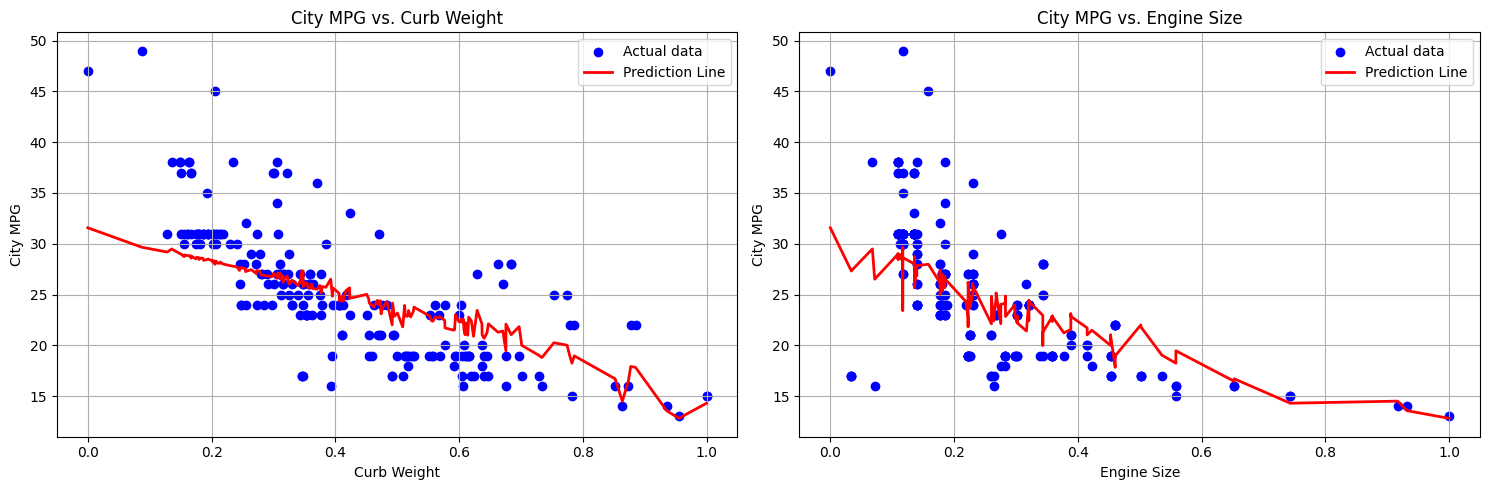

Theta values: [[ 31.56965163]
 [-11.45588565]
 [ -7.8121176 ]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
from sklearn.preprocessing import add_dummy_feature

# Loading dataset
DatasetUrl = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"
df = pd.read_csv(DatasetUrl)

# Extracting features and the target
X1 = df[['curb-weight', 'engine-size']].values
y1 = df['city-mpg'].values.reshape(-1, 1)

# Min-max scaling
X1 = (X1 - X1.min(axis=0)) / (X1.max(axis=0) - X1.min(axis=0))

# Adding the bias term
Xb = add_dummy_feature(X1)

# HYPER-PARAMETERS
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters
lambda_reg = 0.01  # L2 regularization strength
tolerance = 1e-4  # Convergence criteria

# Initializing
m, n_features = Xb.shape
theta = np.random.randn(n_features, 1)
prev_cost = np.inf

def learning_schedule(t):
    return t0 / (t + t1)

# SGD with convergence criteria and visualization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = Xb[random_index:random_index+1]
        yi = y1[random_index:random_index+1]

        # Computing the gradients with L2 regularization
        gradients = 2 * xi.T @ (xi @ theta - yi) + 2 * lambda_reg * theta

        # Updating theta
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

    # Checking convergence
    cost = np.mean((Xb.dot(theta) - y1) ** 2)
    if abs(prev_cost - cost) < tolerance:
        break
    prev_cost = cost

# Predictions using the model
y_pred = Xb @ theta

# Visualizing
fig, axes = mplt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting city-mpg vs. curb-weight
sorted_order = np.argsort(X1[:, 0])
axes[0].scatter(X1[:, 0], y1, color='blue', label='Actual data')
axes[0].plot(X1[sorted_order, 0], y_pred[sorted_order], color='red', label='Prediction Line', linewidth=2)
axes[0].set_xlabel('Curb Weight')
axes[0].set_ylabel('City MPG')
axes[0].legend()
axes[0].grid(True)
axes[0].set_title('City MPG vs. Curb Weight')

# Plotting city-mpg vs. engine-size
sorted_order = np.argsort(X1[:, 1])
axes[1].scatter(X1[:, 1], y1, color='blue', label='Actual data')
axes[1].plot(X1[sorted_order, 1], y_pred[sorted_order], color='red', label='Prediction Line', linewidth=2)
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('City MPG')
axes[1].legend()
axes[1].grid(True)
axes[1].set_title('City MPG vs. Engine Size')

mplt.tight_layout()
mplt.show()

#Final theta value
print("Theta values:", theta)